In [11]:
#smothe
'''
解决不平衡数据集的一种方法是对少数类进行过采样。 最简单的方法是复制少数类中的样本。 
相反，可以从现有样本中合成新样本。 
这是少数类的一种数据增强，称为合成少数类过采样技术，简称 SMOTE。
synthetic 
'''

'\n解决不平衡数据集的一种方法是对少数类进行过采样。 最简单的方法是复制少数类中的样本。 \n相反，可以从现有样本中合成新样本。 \n这是少数类的一种数据增强，称为合成少数类过采样技术，简称 SMOTE。\nsynthetic \n'

In [12]:
# Imported Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import xgboost as xgb
from xgboost import plot_importance, plot_tree

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Other Libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [13]:
path = 'C:/Users/python/Desktop/'
#df = pd.read_csv(str(path) + 'creditcard.csv')
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
# The classes are heavily skewed:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [15]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
df=df.sort_values(by='Class',ascending=False)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
42635,41181.0,-7.334341,4.960892,-8.451410,8.174825,-7.237464,-2.382711,-11.508842,4.635798,-6.557760,...,2.153755,0.033922,-0.014095,0.625250,-0.053390,0.164709,1.411047,0.315645,11.38,1
135718,81372.0,-0.885254,1.790649,-0.945149,3.853433,-1.543510,0.188582,-2.988383,1.344059,-2.294535,...,0.746160,0.550802,-0.034882,-0.567608,-0.528318,0.258782,0.506893,0.176736,7.57,1
10568,17520.0,-5.268053,9.067613,-15.960728,10.296603,-4.708241,-3.395375,-11.161057,5.499963,-5.667376,...,2.004110,0.191058,0.622928,-1.209264,-0.374799,0.648798,1.584697,0.720056,1.00,1
215132,139951.0,-2.921944,-0.228062,-5.877289,2.201884,-1.935440,0.631141,-1.245106,1.511348,-1.899987,...,1.441622,0.895528,1.385511,-2.028024,0.509131,0.172643,0.726781,0.234514,723.21,1
144104,85864.0,-3.365265,2.928541,-5.660999,3.891160,-1.840375,-1.800887,-5.558679,2.402322,-2.848923,...,0.875260,-0.102501,-0.606283,-0.743165,0.096319,-0.135060,1.238695,0.099824,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95068,65155.0,1.507824,-0.457180,-0.214364,-0.793170,-0.207350,-0.058773,-0.394748,-0.195061,-0.615343,...,-0.025890,0.110197,-0.290440,-0.925287,0.918804,-0.063481,0.012964,-0.003206,7.84,0
95069,65155.0,-0.503377,0.878358,1.541229,0.143517,-1.010869,-0.530841,-0.350205,0.469048,0.075054,...,0.229615,0.500844,0.061530,0.394785,-0.599597,0.232721,-0.194458,-0.016911,12.00,0
95070,65155.0,1.074335,-0.085551,0.747311,1.395833,-0.553542,0.186857,-0.371126,0.297574,0.510277,...,-0.002702,0.143968,-0.046115,0.196057,0.514512,-0.293995,0.041147,0.009356,14.00,0
95071,65156.0,1.134910,0.224390,0.779909,0.936986,-0.280685,0.038914,-0.239523,0.157356,-0.131908,...,-0.111060,-0.296201,0.128768,-0.021375,0.211048,-0.611278,0.053280,0.020996,0.12,0


<AxesSubplot:ylabel='Frequency'>

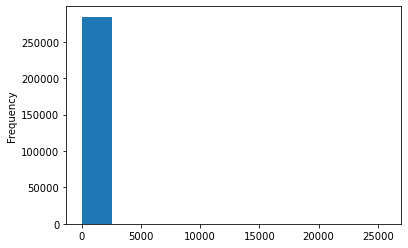

In [17]:
df['Amount'].plot(kind="hist")

In [18]:
#随机抽取5000条class为0的样本
df_NF = df.query('(Class == 0)').sample(n=5000)
df_F = df.query('(Class == 1)')
df_sample = pd.concat([df_F,df_NF])
df_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
42635,41181.0,-7.334341,4.960892,-8.451410,8.174825,-7.237464,-2.382711,-11.508842,4.635798,-6.557760,...,2.153755,0.033922,-0.014095,0.625250,-0.053390,0.164709,1.411047,0.315645,11.38,1
135718,81372.0,-0.885254,1.790649,-0.945149,3.853433,-1.543510,0.188582,-2.988383,1.344059,-2.294535,...,0.746160,0.550802,-0.034882,-0.567608,-0.528318,0.258782,0.506893,0.176736,7.57,1
10568,17520.0,-5.268053,9.067613,-15.960728,10.296603,-4.708241,-3.395375,-11.161057,5.499963,-5.667376,...,2.004110,0.191058,0.622928,-1.209264,-0.374799,0.648798,1.584697,0.720056,1.00,1
215132,139951.0,-2.921944,-0.228062,-5.877289,2.201884,-1.935440,0.631141,-1.245106,1.511348,-1.899987,...,1.441622,0.895528,1.385511,-2.028024,0.509131,0.172643,0.726781,0.234514,723.21,1
144104,85864.0,-3.365265,2.928541,-5.660999,3.891160,-1.840375,-1.800887,-5.558679,2.402322,-2.848923,...,0.875260,-0.102501,-0.606283,-0.743165,0.096319,-0.135060,1.238695,0.099824,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15170,26526.0,-0.056091,-3.538053,-0.776816,-0.793399,-1.713498,0.475244,0.011139,-0.042442,-2.062491,...,0.346555,-0.195853,-0.692621,-0.245951,0.199679,-0.100374,-0.101439,0.122047,767.59,0
102708,68326.0,1.430591,-1.099447,0.418261,-1.481223,-1.365698,-0.243591,-1.135627,0.074893,-2.004946,...,-0.142361,-0.054446,0.058974,-0.011254,0.261251,-0.192208,0.037815,0.006232,15.00,0
148576,90056.0,1.954851,0.738092,-2.632893,1.887000,1.210382,-1.261682,0.769583,-0.522209,1.353222,...,-0.237063,-0.262560,-0.124379,-0.683082,0.486212,-0.507663,-0.016983,-0.007448,53.00,0
261762,160170.0,1.809480,-0.394137,-1.006021,-0.005627,0.279112,1.050355,-0.780298,0.525340,1.080158,...,-0.141130,-0.209977,0.396113,-1.554985,-0.730253,-0.182815,0.068841,-0.032471,20.00,0


In [19]:
X_0 = df_sample.drop(['Class','Time','Amount'],axis=1)
y_0= df_sample['Class']
smo = SMOTE(random_state=42)
X, y = smo.fit_resample(X_0, y_0)

In [20]:
#通过smote，我们可以得到一个1，0分别为5000条的dataframe
df1 = X.join(y)
df1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-7.334341,4.960892,-8.451410,8.174825,-7.237464,-2.382711,-11.508842,4.635798,-6.557760,-11.519861,...,0.723314,2.153755,0.033922,-0.014095,0.625250,-0.053390,0.164709,1.411047,0.315645,1
1,-0.885254,1.790649,-0.945149,3.853433,-1.543510,0.188582,-2.988383,1.344059,-2.294535,-1.886176,...,0.370041,0.746160,0.550802,-0.034882,-0.567608,-0.528318,0.258782,0.506893,0.176736,1
2,-5.268053,9.067613,-15.960728,10.296603,-4.708241,-3.395375,-11.161057,5.499963,-5.667376,-11.627194,...,1.455878,2.004110,0.191058,0.622928,-1.209264,-0.374799,0.648798,1.584697,0.720056,1
3,-2.921944,-0.228062,-5.877289,2.201884,-1.935440,0.631141,-1.245106,1.511348,-1.899987,-6.428231,...,2.230735,1.441622,0.895528,1.385511,-2.028024,0.509131,0.172643,0.726781,0.234514,1
4,-3.365265,2.928541,-5.660999,3.891160,-1.840375,-1.800887,-5.558679,2.402322,-2.848923,-5.995676,...,0.576379,0.875260,-0.102501,-0.606283,-0.743165,0.096319,-0.135060,1.238695,0.099824,1


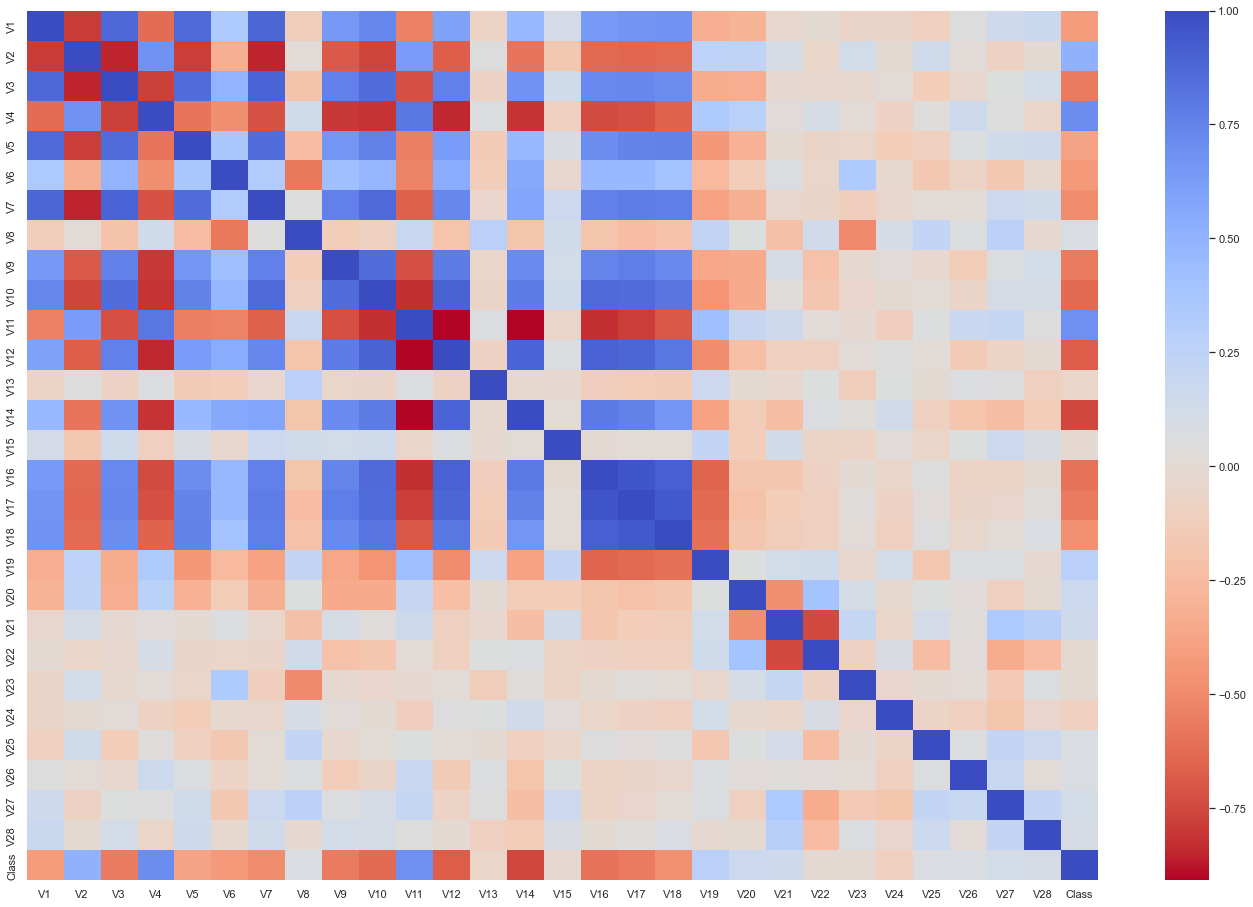

In [27]:
sns.set(rc = {'figure.figsize':(24,16)})
corr = df1.corr()
ax = sns.heatmap(corr, cmap='coolwarm_r',annot_kws={'size':20})

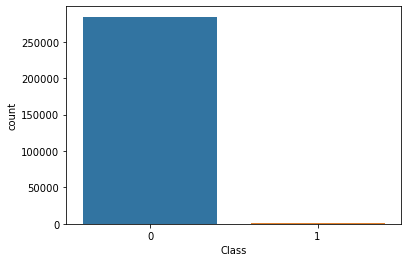

In [10]:
sns.countplot('Class',data=df)#原来的
plt.show()

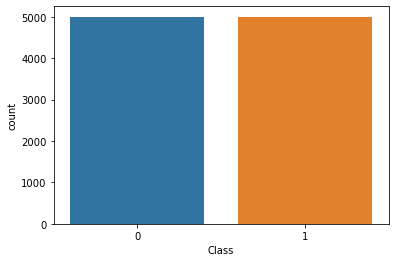

In [11]:
sns.countplot('Class',data=df1)
plt.show()

In [12]:
df2=df1.sample(len(df1))
df2#打乱数据

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
7871,-3.603574,1.468508,-3.818743,1.286836,-1.042075,-1.433101,-3.380034,0.377896,-1.907780,-4.005034,...,-0.103369,0.745611,1.373238,-0.722798,-0.160081,-0.142862,-0.151744,-0.062522,-0.022517,1
6358,-6.146826,7.108451,-13.006395,7.900518,-8.084076,-3.857892,-12.152326,4.956865,-4.163410,-13.005485,...,0.435714,2.498188,0.546225,0.486534,0.372968,-0.291400,-0.144966,-0.169149,0.382657,1
4803,-2.450681,1.268581,0.700221,0.127080,0.322626,-0.855197,0.225443,-1.722290,-0.099691,0.169729,...,-0.681835,1.565506,-0.124736,-0.079248,0.398596,0.214950,-0.548897,-0.362286,0.060484,0
2616,-0.672270,-1.181264,1.760501,-2.306453,-2.148069,-0.309485,0.284768,-0.065594,-2.005087,0.493418,...,0.177192,0.119099,0.186658,0.601588,0.306175,-0.401735,-0.456604,0.074047,0.171799,0
8065,-2.940097,3.386469,-4.131279,4.752581,-3.057644,-0.106159,-4.530921,-0.194327,-2.560833,-4.582936,...,0.021797,2.490975,0.033961,0.214921,-0.075904,-0.417687,0.116624,0.666775,0.132588,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266,-0.573058,0.776887,1.499359,1.271607,0.044852,0.236392,0.501978,0.290133,-0.432991,0.072661,...,0.162598,0.043245,0.338092,-0.044991,0.206638,-0.164177,-0.250910,0.407131,0.197839,0
3841,0.952131,-2.623037,-1.024771,0.151347,-1.396583,0.227529,-0.187562,-0.053838,-0.477467,0.728940,...,0.631459,-0.210074,-1.395948,0.024685,0.732610,-0.907317,-0.180112,-0.105790,0.064569,0
9856,-5.722823,3.763875,-6.232627,4.091290,-1.947348,-1.295524,-4.445017,-0.673555,-1.532573,-3.091765,...,-0.663181,2.478522,-0.042090,0.297801,0.701130,-0.664587,0.494932,-1.499944,1.511498,1
9711,-1.991640,0.320838,-1.909171,2.861735,-3.177011,0.435582,-0.946164,1.073265,-1.586018,-3.898942,...,1.521711,0.846438,0.239555,1.087353,-0.081990,0.067913,0.640433,0.313005,0.253297,1


In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [14]:
from sklearn.model_selection import cross_val_score

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "XGBoost": xgb.XGBClassifier(objective='count:poisson')
}

for key,classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

#到这里我们已经做好了5个classifiers的fit，下面就是用GridSearchCV 来找最佳参数

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 98.0 % accuracy score
Classifiers:  SVC Has a training score of 94.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 96.0 % accuracy score
Classifiers:  XGBClassifier Has a training score of 97.0 % accuracy score


In [15]:
###可以动数字
# Logistic Regression的
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.01, 0.1, 0.5, 0.7, 1, 2],'random_state':[0, 3, 42]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_
print(log_reg)
# KNears classifier
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
knears_neighbors = grid_knears.best_estimator_
print(knears_neighbors)
# Support Vector Classifier
svc_params = {'C': [0.5, 0.6, 0.7, 0.8, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_
print(svc)
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
tree_clf = grid_tree.best_estimator_
print(tree_clf)
# XGB Classifier
XGB_params = {'max_depth':[4,5,6,7,8,9], 'min_child_weight':[2,3,4,5,6,7,8], 'learning_rate': [0.05,0.1,0.2]}
grid_XGB = GridSearchCV(xgb.XGBClassifier(), XGB_params)
grid_XGB.fit(X_train, y_train)
XGB_clf = grid_XGB.best_estimator_
print(XGB_clf)

LogisticRegression(C=0.7, random_state=0)
KNeighborsClassifier(n_neighbors=2)
SVC(C=1)
DecisionTreeClassifier(max_depth=3, min_samples_leaf=6)
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


In [16]:

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

KNears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Classifier Cross Validation Score', round(KNears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

xgb_score = cross_val_score(XGB_clf, X_train, y_train, cv=5)
print('XGBoost Classifier Cross Validation Score', round(xgb_score.mean() * 100, 2).astype(str) + '%')
#到这里我们都训练好了，下面的工作应该是评价我们的model了

Logistic Regression Cross Validation Score:  94.2%
Knears Neighbors Classifier Cross Validation Score 98.89%
Support Vector Classifier Cross Validation Score 94.22%
DecisionTree Classifier Cross Validation Score 93.05%
XGBoost Classifier Cross Validation Score 99.08%


In [18]:
from sklearn.model_selection import cross_val_predict

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

KNears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

xgb_pred = cross_val_predict(XGB_clf, X_train, y_train, cv=5)

In [19]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('Knears Neighbors Classifier: ', roc_auc_score(y_train, svc_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))
print('XGBoost Classifier: ', roc_auc_score(y_train, xgb_pred))

Logistic Regression:  0.9866702200079951
Knears Neighbors Classifier:  0.9878892227507512
Support Vector Classifier:  0.9878892227507512
Decision Tree Classifier:  0.9305807813067579
XGBoost Classifier:  0.990748854184922


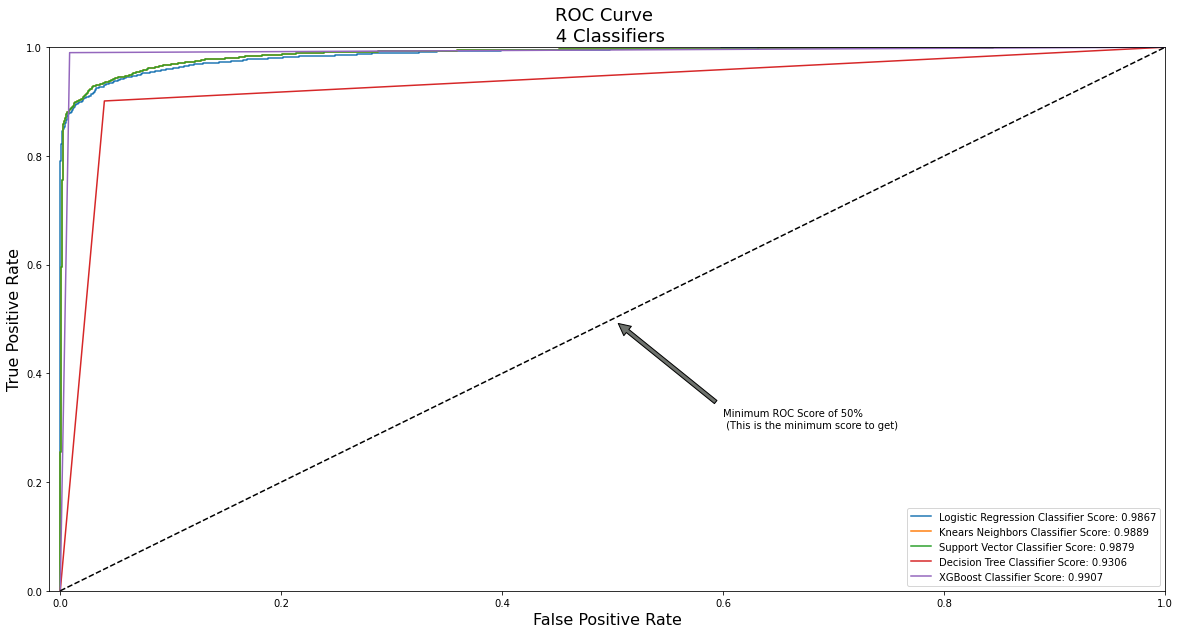

In [20]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
KNears_fpr, KNears_tpr, KNears_threshold = roc_curve(y_train, svc_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)
xgb_fpr, xgb_tpr, xgb_threshold = roc_curve(y_train, xgb_pred)

def graph_roc_curve_multiple(log_fpr, log_tpr,KNears_fpr, KNears_tpr,svc_fpr, svc_tpr, tree_fpr, tree_tpr,xgb_fpr, xgb_tpr):
    plt.figure(figsize=(20,10))
    plt.title('ROC Curve \n 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(KNears_fpr, KNears_tpr, label='Knears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, KNears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot(xgb_fpr, xgb_tpr, label='XGBoost Classifier Score: {:.4f}'.format(roc_auc_score(y_train, xgb_pred)))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr,KNears_fpr, KNears_tpr,svc_fpr, svc_tpr, tree_fpr, tree_tpr,xgb_fpr, xgb_tpr)
plt.show()

In [21]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 30)
print('Logistic Regression: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 30)

------------------------------------------------------------------------------------------
Logistic Regression: 

Recall Score: 0.91
Precision Score: 0.98
F1 Score: 0.94
Accuracy Score: 0.94
------------------------------------------------------------------------------------------


In [22]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_train, KNears_pred)
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

y_pred =knears_neighbors.predict(X_train)

# Overfitting Case
print('---' * 30)
print('Knears Neighbors Classifier: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 30)

------------------------------------------------------------------------------------------
Knears Neighbors Classifier: 

Recall Score: 1.00
Precision Score: 1.00
F1 Score: 1.00
Accuracy Score: 1.00
------------------------------------------------------------------------------------------


In [23]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_train, svc_pred)

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = svc.predict(X_train)

# Overfitting Case
print('---' * 30)
print('Support Vector Classifier: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 30)

------------------------------------------------------------------------------------------
Support Vector Classifier: 

Recall Score: 0.90
Precision Score: 0.98
F1 Score: 0.94
Accuracy Score: 0.94
------------------------------------------------------------------------------------------


In [24]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_train, tree_pred)

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = tree_clf.predict(X_train)

# Overfitting Case
print('---' * 30)
print('Decision Tree: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 30)

------------------------------------------------------------------------------------------
Decision Tree: 

Recall Score: 0.90
Precision Score: 0.97
F1 Score: 0.93
Accuracy Score: 0.93
------------------------------------------------------------------------------------------


In [25]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_train, xgb_pred)

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = XGB_clf.predict(X_train)

# Overfitting Case
print('---' * 30)
print('XGboost: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 30)

------------------------------------------------------------------------------------------
XGboost: 

Recall Score: 1.00
Precision Score: 1.00
F1 Score: 1.00
Accuracy Score: 1.00
------------------------------------------------------------------------------------------


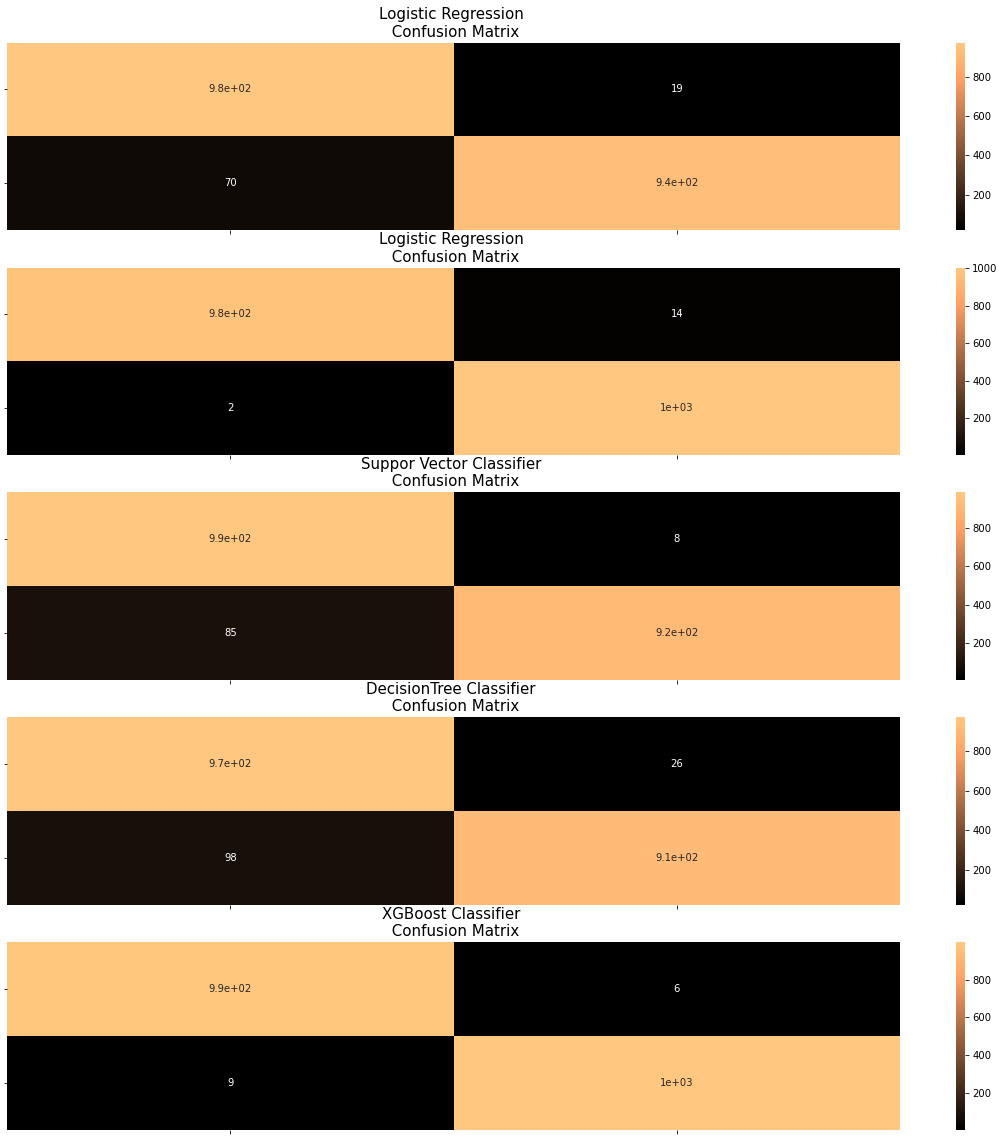

In [26]:
# Confusion Matrix  
from sklearn.metrics import confusion_matrix

y_pred_log_reg = log_reg.predict(X_test)
y_pred_knears_neighbors = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)
y_pred_xgb = XGB_clf.predict(X_test)

log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
knears_neighbors_cf = confusion_matrix(y_test, y_pred_knears_neighbors)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)
xgb_cf = confusion_matrix(y_test, y_pred_xgb)

f, ((ax1, ax2,ax3, ax4,ax5)) = plt.subplots(5, 1, figsize=(20,20))

sns.heatmap(log_reg_cf, ax=ax1, annot=True, cmap=plt.cm.copper)
ax1.set_title("Logistic Regression \n Confusion Matrix", fontsize=15)
ax1.set_xticklabels(['', ''], fontsize=14, rotation=90)
ax1.set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(knears_neighbors_cf, ax=ax2, annot=True, cmap=plt.cm.copper)
ax2.set_title("Knears Neighbors \n Confusion Matrix", fontsize=15)
ax2.set_xticklabels(['', ''], fontsize=14, rotation=90)
ax2.set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax3, annot=True, cmap=plt.cm.copper)
ax3.set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=15)
ax3.set_xticklabels(['', ''], fontsize=14, rotation=90)
ax3.set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax4, annot=True, cmap=plt.cm.copper)
ax4.set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=15)
ax4.set_xticklabels(['', ''], fontsize=14, rotation=90)
ax4.set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(xgb_cf, ax=ax5, annot=True, cmap=plt.cm.copper)
ax5.set_title("XGBoost Classifier \n Confusion Matrix", fontsize=15)
ax5.set_xticklabels(['', ''], fontsize=14, rotation=90)
ax5.set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.show()